In [189]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append('..')

from dataset import Dataset, DatasetIndex
from linknet import LinkNetBatch
from plot_functions import plot_examples

ModuleNotFoundError: No module named 'plot_functions'

In [2]:
MNIST_SIZE = 65000
BATCH_SIZE = 512
MAX_ITER = 200

In [3]:
# создадим индекс и датасет для построения пайплайна

ind = DatasetIndex(np.arange(MNIST_SIZE))
mnistset = Dataset(ind, batch_class=LinkNetBatch)
mnistset.cv_split([0.9, 0.1])

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [5]:
prediction = []
test_loss = []
train_loss = []

In [6]:
# пайплайны для обучения и контроля

level = 0.9
pieces = 50
distr = 'uniform'

ppl = mnistset.train.pipeline()\
        .load_images()\
        .random_location() \
        .create_mask()\
        .add_noise(level, pieces, distr)\
        .train(sess)\
        .get_stat(sess, train_loss, True)\
        
ppl_test = mnistset.test.pipeline()\
            .load_images()\
            .random_location() \
            .create_mask()\
            .add_noise(noise_params)

In [20]:
# обучение
for i in range(MAX_ITER):
    ppl.next_batch(BATCH_SIZE, n_epochs=None)
    ppl_test.get_stat(sess, test_loss, False).next_batch(100, n_epochs=None)
    if (i+1) % 10 == 0:
        print("Iter {}: Train loss: {}, test loss: {}".format(i+1, train_loss[-1], test_loss[-1]))

Iter 10: Train loss: 0.293917715549469, test loss: 0.28999561071395874
Iter 20: Train loss: 0.2672365605831146, test loss: 0.28272807598114014
Iter 30: Train loss: 0.2435099333524704, test loss: 0.22917012870311737
Iter 40: Train loss: 0.22538156807422638, test loss: 0.20496869087219238
Iter 50: Train loss: 0.21138738095760345, test loss: 0.18107539415359497
Iter 60: Train loss: 0.1805391162633896, test loss: 0.16108062863349915
Iter 70: Train loss: 0.14016908407211304, test loss: 0.12097986787557602
Iter 80: Train loss: 0.1113848090171814, test loss: 0.07658912241458893
Iter 90: Train loss: 0.09644346684217453, test loss: 0.07128653675317764
Iter 100: Train loss: 0.09923014789819717, test loss: 0.06104840338230133
Iter 110: Train loss: 0.09433776885271072, test loss: 0.054968949407339096
Iter 120: Train loss: 0.0821441262960434, test loss: 0.05320778861641884
Iter 130: Train loss: 0.08524001389741898, test loss: 0.050538673996925354
Iter 140: Train loss: 0.08125980198383331, test loss

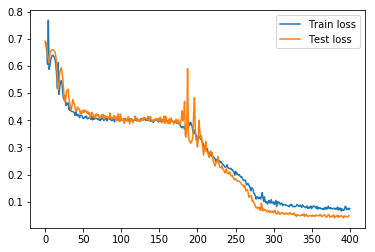

In [21]:
plt1, = plt.plot(train_loss,  label='Train loss')
plt2, = plt.plot(test_loss, label='Test loss')
plt.legend(handles=[plt1, plt2])
plt.show()

In [7]:
prediction = []
images = []
masks = []
ppl.get_images(images, masks)\
        .predict_proba(sess, prediction).next_batch(10, n_epochs=None)

[TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",), TypeError("add_noise() got multiple values for argument 'ind'",)]


Exception: Something bad happened

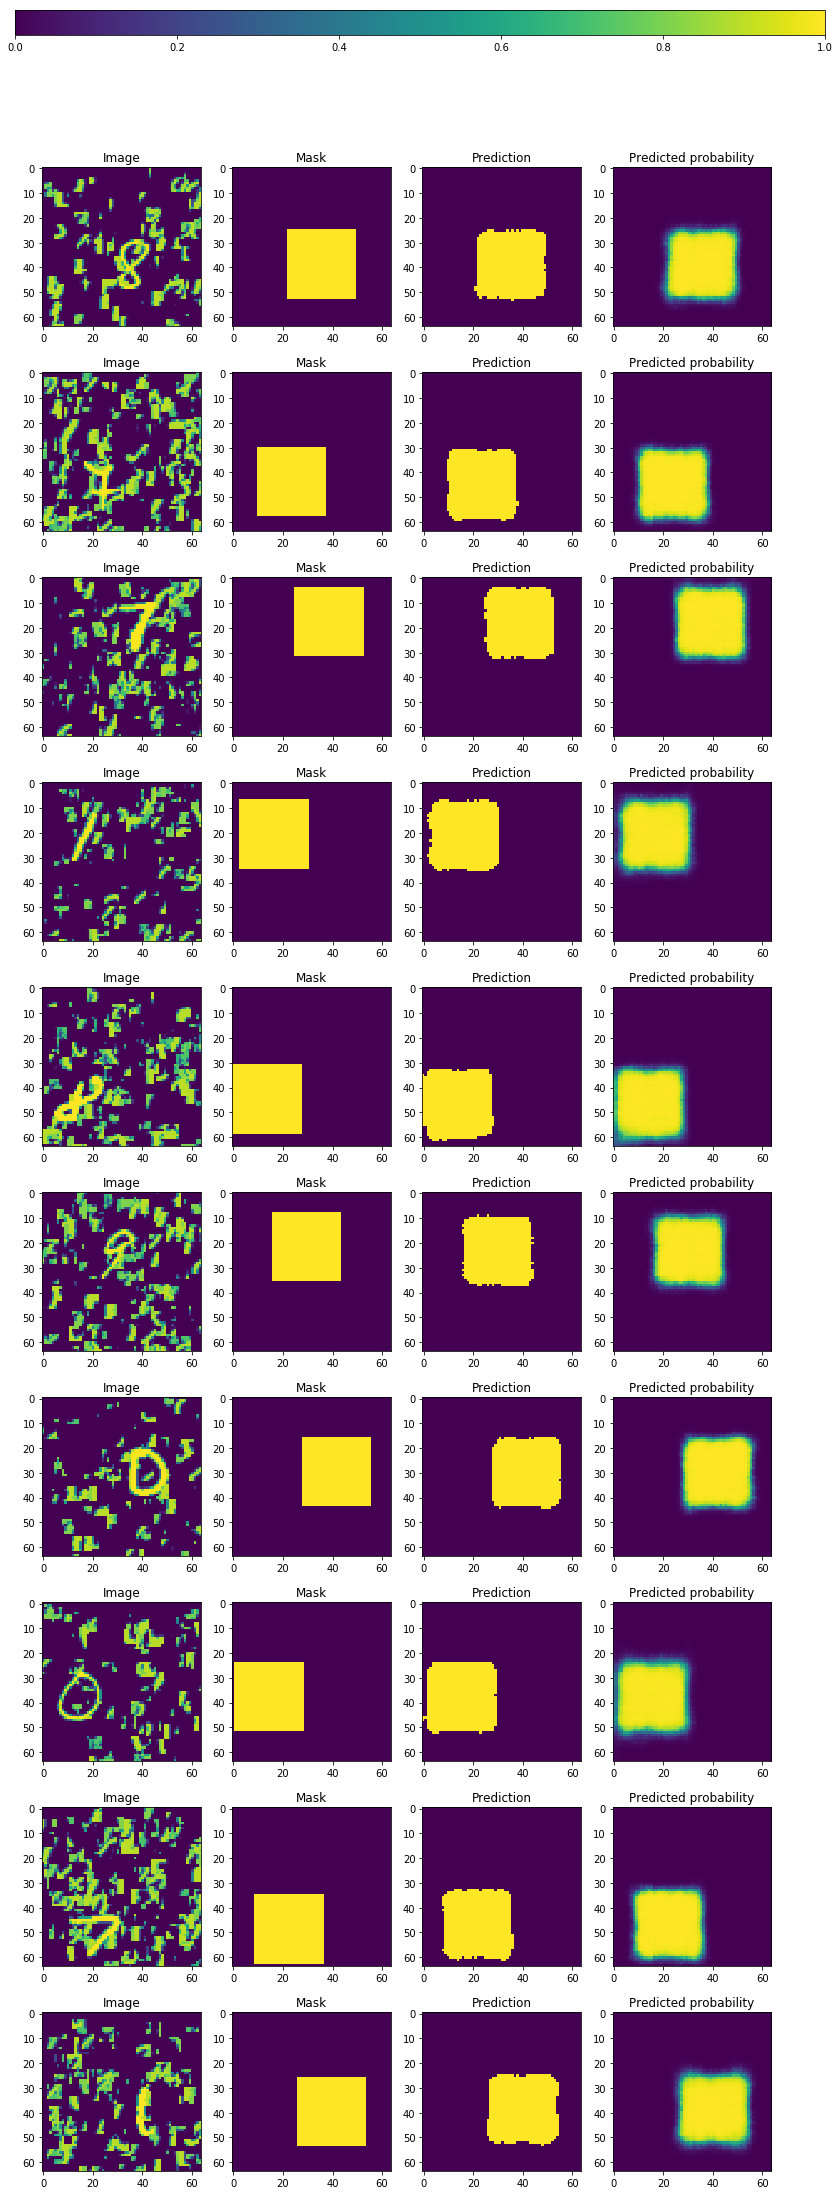

In [23]:
plot_examples(images, masks, prediction)